# Second Capstone: Modeling
### Goals:
1. Final Cleanup of dataset, eliminating or imputing all null values
2. Creation of dummy variable for categorical data
3. Scaling the data 
4. Evaluation of 4 models: Decision Tree, Random Forest, Gradient Boost, Logistic Regression


In [1]:
#Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import calendar

import scipy.stats
from scipy.stats import t
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import preprocessing

from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

# Random Forest
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [2]:
#load the cleaned dataset from EDA section
file = '/Users/sangeetajayakar/Springboard_Course/Files_for_second_capstone/weatherAUS_files/rain_data_cleaned_4.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,RainTomorrow,Month,Year,Pressure_Diff,Humidity_Diff
0,0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,22.0,1007.1,NaN,0.0,0,12,2008,-0.6,-49.0
1,1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,25.0,1007.8,NaN,0.0,0,12,2008,-2.8,-19.0
2,2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,30.0,1008.7,2.0,0.0,0,12,2008,1.1,-8.0
3,3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,16.0,1012.8,NaN,0.0,0,12,2008,-4.8,-29.0
4,4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,33.0,1006.0,8.0,0.0,0,12,2008,-4.8,-49.0


In [3]:
# inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     142193 non-null  int64  
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   Humidity3pm    138583 non-null  float64
 10  Pressure3pm    128212 non-null  float64
 11  Cloud3pm       85099 non-null   float64
 12  RainToday      140787 non-null  float64
 13  RainTomorrow   142193 non-null  int64  
 14  Month          142193 non-null  int64  
 15  Year           142193 non-null  int64  
 16  Pressure_Diff  127989 non-null  float64
 17  Humidity_Diff  137907 non-nul

In [4]:
# 3 columns with half of the values missing, we will impute null values in these columns with the median
df[['Evaporation', 'Sunshine', 'Cloud3pm']] = df[['Evaporation', 'Sunshine', 'Cloud3pm']].fillna(df.median())
df.isnull().sum()

Unnamed: 0           0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed     9270
Humidity3pm       3610
Pressure3pm      13981
Cloud3pm             0
RainToday         1406
RainTomorrow         0
Month                0
Year                 0
Pressure_Diff    14204
Humidity_Diff     4286
dtype: int64

In [5]:
df.shape
#df.dropna(thresh=16)

# if a row has more than 2 missing values, we will drop the row
#d = np.where(df.isnull().sum(axis=1)>2)
#df = df.drop(df.index[d])
#df.isnull().sum()

(142193, 18)

<AxesSubplot:>

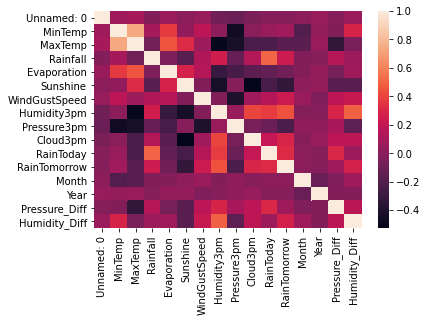

In [6]:
sns.heatmap(df.corr())

In [7]:
# Month and Year columns must be changed to categorical values
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Month'].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

In [8]:
df['Year'] = df['Year'].astype('object')

In [9]:
df['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=object)

In [10]:
#drop unnamed column
df = df.drop(['Unnamed: 0'], axis = 1)
df.shape

(142193, 17)

In [11]:
df = df.dropna()
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
Humidity3pm      0
Pressure3pm      0
Cloud3pm         0
RainToday        0
RainTomorrow     0
Month            0
Year             0
Pressure_Diff    0
Humidity_Diff    0
dtype: int64

In [12]:
df.shape

(119674, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119674 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       119674 non-null  object 
 1   MinTemp        119674 non-null  float64
 2   MaxTemp        119674 non-null  float64
 3   Rainfall       119674 non-null  float64
 4   Evaporation    119674 non-null  float64
 5   Sunshine       119674 non-null  float64
 6   WindGustDir    119674 non-null  object 
 7   WindGustSpeed  119674 non-null  float64
 8   Humidity3pm    119674 non-null  float64
 9   Pressure3pm    119674 non-null  float64
 10  Cloud3pm       119674 non-null  float64
 11  RainToday      119674 non-null  float64
 12  RainTomorrow   119674 non-null  int64  
 13  Month          119674 non-null  object 
 14  Year           119674 non-null  object 
 15  Pressure_Diff  119674 non-null  float64
 16  Humidity_Diff  119674 non-null  float64
dtypes: float64(12), int64(1), obj

### Create dummy variables for categorical features

In [14]:
dfo = df.select_dtypes(include=['object'])
dfo.shape
#get levels for all categorical variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Location,44
1,WindGustDir,16
2,Month,12
3,Year,11


##### Observation: 
The number of 'Locations' dropped from 49 to 44 indicating that there were 5 locations that did not record measurments for many of the features.

In [15]:
# get list of all columns
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm',
       'Cloud3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year',
       'Pressure_Diff', 'Humidity_Diff'],
      dtype='object')

In [16]:
# features except Target feature
feature_cols = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm',
       'Cloud3pm', 'RainToday', 'Month',
       'Pressure_Diff', 'Humidity_Diff']
new_X = df[feature_cols]
new_X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm',
       'Cloud3pm', 'RainToday', 'Month', 'Pressure_Diff', 'Humidity_Diff'],
      dtype='object')

In [17]:

# create dataframe with features and dummy variables called features_df
features_df = pd.get_dummies(new_X)
features_df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,13.4,22.9,0.6,4.8,8.5,44.0,22.0,1007.1,5.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,25.0,1007.8,5.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,4.8,8.5,46.0,30.0,1008.7,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,4.8,8.5,24.0,16.0,1012.8,5.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,33.0,1006.0,8.0,0.0,...,1,0,0,0,0,0,0,0,0,0


### Split into Train and Test sets

In [18]:
# define your X and y
X = features_df
y = df['RainTomorrow']

# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Scaling the Data


In [19]:
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


## Four models to try:  
1. Decision tree
2. Random Forest  
3. Gradient Boost
4. Logistic Regression

### 1. Decision Tree: 

#### Gini impurity model - max depth 3- no class weight balance
This is the first attempt at modeling using a decision tree model just to get an idea:

In [20]:
# make a variable called it gini_model, and ensure the max_depth parameter is set to 3
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=124, max_depth=3)

# Do the fit, predict, and series transformations
gini_model.fit(X_train_scaled, y_train)
y_pred = gini_model.predict(X_test_scaled)
pd.Series(y_pred)
gini_model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 124,
 'splitter': 'best'}

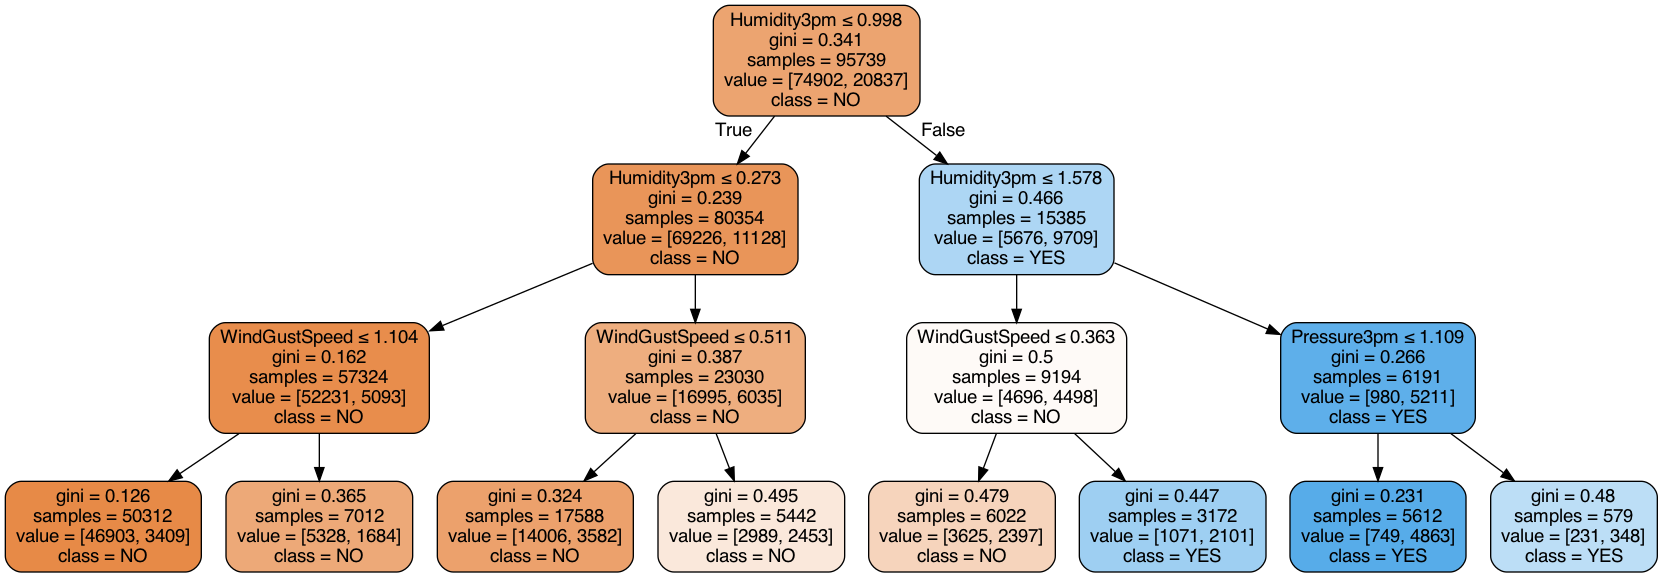

In [21]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
# Checking various metrics: 

print("Gini impurity  model - max depth 3")
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('F1 score' , metrics.f1_score(y_test,y_pred))

Gini impurity  model - max depth 3
Precision score 0.7734505862646566
Recall score 0.9708544337894623
F1 score 0.47596959154748103


#### Gini impurity model - max depth 3 with class weight balanced
Now we are adding the parameter for class_weight balancing because we have unbalanced classes (more Yes's than No's for the 'RainTomorrow' target feature. 

In [23]:

gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state=124, max_depth=3, class_weight='balanced')

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train_scaled, y_train)
y_pred = gini_model2.predict(X_test_scaled)
pd.Series(y_pred)
gini_model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 124,
 'splitter': 'best'}

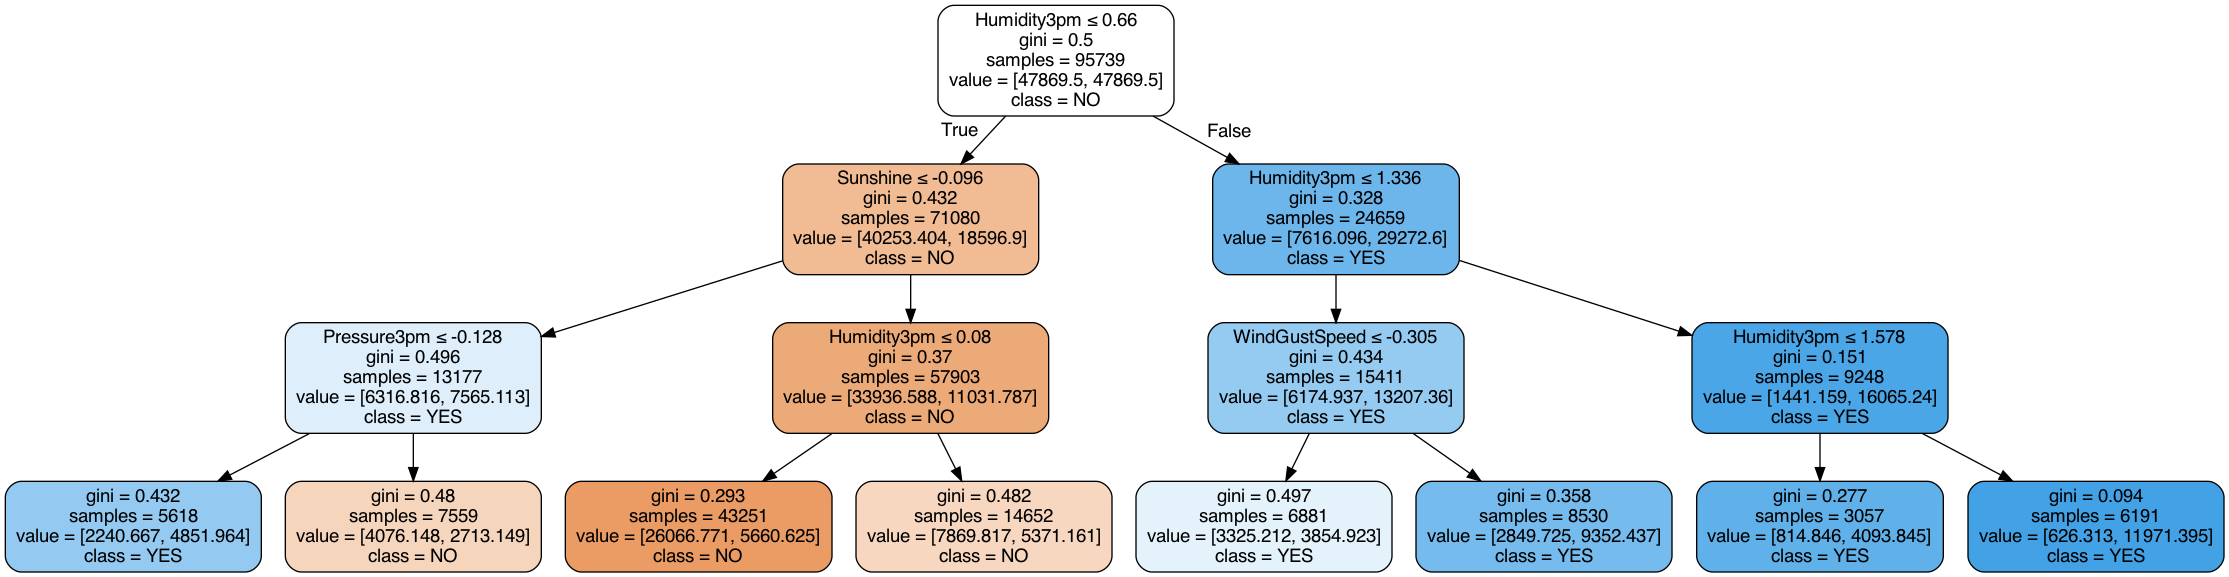

In [24]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
# Checking various metrics: 

print("Gini impurity  model - max depth 3 with class weight balanced")
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('F1 score' , metrics.f1_score(y_test,y_pred))

Gini impurity  model - max depth 3 with class weight balanced
Precision score 0.5003292506255762
Recall score 0.7956039219911647
F1 score 0.585994138516119


####  Deciding which metrics to use to assess model performance going forward: 
F1 score will be primarily used to assess model performance. This is the best metric to use for unbalanced classes when we are interested in a small positive class. 


### Hyperparameter tuning of Decision Tree using training set.

In [26]:
# making a function to score the performance of the models. 
# this scoring function will use f1 score as the metric. 
from sklearn.metrics import make_scorer

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #   Calculate the performance score between 'y_true' and 'y_predict'
    score = f1_score(y_true, y_predict)
    
    # Return the score
    return score

scoring_fnc = make_scorer(performance_metric)

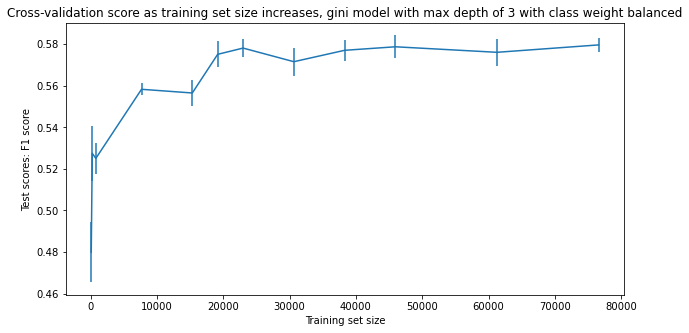

In [27]:
# use the learning curve function to test different sizes (fractions) of the training set
# to use for modeling
#

fractions = [0.001, 0.003, 0.01, 0.1, .2, .25, .3, .4, .5, .6, .8, 1]
train_size, train_scores, test_scores = learning_curve(gini_model2, X_train_scaled, y_train, train_sizes=fractions, 
                                                       cv = 5, scoring=scoring_fnc)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# 'test_score' is actually the CV score.
# This function only uses the training set, the original test set is still set aside. 

plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('Test scores: F1 score')
plt.title('Cross-validation score as training set size increases, gini model with max depth of 3 with class weight balanced');

##### Optimal Training size:
The optimal training size is approximately 25,000. 

[]

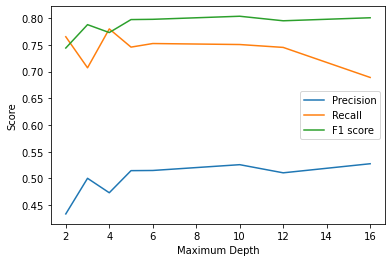

In [28]:
# test out different max depths, using gini model Decision Tree, class weight balancing

maxd = [2, 3, 4, 5, 6,  10, 12, 16]

precisionscore = [] 
recallscore = []
f1score = []
for d in maxd:
    gini_modelmd = tree.DecisionTreeClassifier(criterion='gini', random_state=124, max_depth=d, class_weight='balanced')
    
    gini_modelmd.fit(X_train_scaled, y_train)
    y_pred = gini_modelmd.predict(X_test_scaled)
    #pd.Series(y_pred)
    #gini_model2
    precisionscore.append(metrics.precision_score(y_test,y_pred, pos_label = 1))
    recallscore.append(metrics.recall_score(y_test,y_pred))
    f1score.append(metrics.f1_score(y_test, y_pred, average='weighted'))
    
 # Plot training error over domain
plt.plot(maxd, precisionscore, label='Precision')
plt.plot(maxd, recallscore, label='Recall')
plt.plot(maxd, f1score, label='F1 score')
#plt.plot(X, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Score') # Label y-axis
plt.legend() # Show plot labels as legend
plt.plot() # Show graph    



In [29]:
gini_modelmd.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 124,
 'splitter': 'best'}

##### Max Depth: 
It looks like the optimal max depth is 6. 

Now trying a decision tree using the max depth 6

In [30]:
# make a variable called it gini_model, and ensure the max_depth parameter is set to 6
gini_model3 = tree.DecisionTreeClassifier(criterion='gini', random_state=124, max_depth=6, class_weight='balanced')

# Do the fit, predict, and series transformations as before. 
gini_model3.fit(X_train_scaled, y_train)
y_pred = gini_model3.predict(X_test_scaled)
pd.Series(y_pred)
print('F1 score' , metrics.f1_score(y_test,y_pred))

F1 score 0.6114640048396854


### Random Forest

We know the optimal training set size is about 25000 samples.
We know the optimal max_depth is around 6 based on F1 score. 
Now using this information we will proceed to evaluate a Random Forest model. 
We will still need assess the max depth as well as the number of trees.

In [31]:
# checking how many columns we have in the data set, this will help us in choosing number of trees
X.shape

(119674, 84)

we have 84 columns in our dataset, not including the target feature. 

##### Grid Search CV for Random Forest

In [32]:
# selecting a subset of the data containing 25000 records
Xtrain = X_train_scaled[:25000]
ytrain = y_train.iloc[:25000]


In [33]:
from sklearn import ensemble


#  Create a random forest object
rfmodel = ensemble.RandomForestClassifier(class_weight='balanced')

#  Create a dictionary for the parameter 'max_depth' and 'n_estimators'
params = {'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
          'n_estimators': [70, 100, 150, 200, 250]}

#  Transform 'performance_metric' into a scoring function using 'make_scorer' 
scoring_fnc = make_scorer(performance_metric)

#   Create the grid search cv object --> GridSearchCV()
# Make sure to include the right parameters in the object:
# (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
grid = GridSearchCV(rfmodel, params, scoring_fnc, cv=5)

# Fit the grid search object to the data to compute the optimal model
grid = grid.fit(Xtrain, ytrain)


#   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


/Users/sangeetajayakar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass scoring=make_scorer(performance_metric) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Best Score:0.64623908823085
Best Parameters: {'max_depth': 14, 'n_estimators': 200}


##### From Grid Search CV:
Optimal Max Depth is 14
Optimal Number of Trees is 200

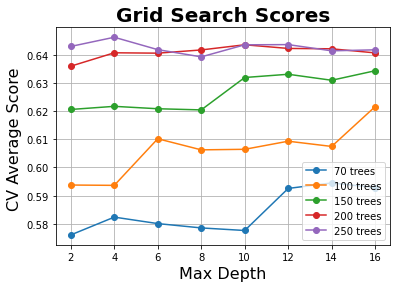

In [34]:
# Try to graph grid search results

def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):

    scores_mean = cv_results['mean_test_score']

    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']

    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores

    fig, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)

    for idx, val in enumerate(grid_param_2):

        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= str(val)+' trees')

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')

    ax.set_xlabel(name_param_1, fontsize=16)
    
    ax.set_ylabel('CV Average Score ', fontsize=16)

    ax.legend(loc="lower right", fontsize=10)

    ax.grid('on')



    
plot_grid_search(grid.cv_results_, params['max_depth'], params['n_estimators'], 
                 'Max Depth', 'N_Estimators: num of trees' )


#### From the plot of GridSearchCV scores:
Trying to make the model simlpler, using 150 trees and max depth 10 for Random Forest model.


#### Feature Importances

In [35]:
from sklearn.inspection import permutation_importance

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=10)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

In [37]:
rf.feature_importances_

array([1.77787135e-02, 2.62106173e-02, 9.99177284e-02, 1.21460857e-02,
       8.88366924e-02, 6.21774828e-02, 3.17429759e-01, 6.81133921e-02,
       7.48495077e-02, 7.44417919e-02, 2.20970799e-02, 8.23075018e-02,
       6.28242268e-04, 4.03257663e-04, 1.04584967e-03, 4.09890460e-04,
       6.82652173e-04, 4.35999138e-04, 5.14029069e-04, 1.21163297e-03,
       3.95798941e-04, 3.17078289e-04, 7.92165032e-04, 6.98326692e-04,
       1.13899787e-03, 7.13119074e-04, 9.27336819e-04, 2.47683688e-04,
       1.98066575e-04, 3.18465688e-04, 5.22473389e-04, 5.44772644e-04,
       3.49540736e-04, 5.84221387e-04, 1.96941586e-04, 1.12235836e-03,
       1.13663812e-03, 3.10651748e-04, 4.11101544e-04, 9.38960161e-04,
       5.98912218e-04, 1.64329982e-03, 4.93994214e-04, 5.00122291e-04,
       4.95650513e-04, 6.54764957e-04, 6.42195057e-04, 4.17573723e-04,
       2.96999692e-04, 3.69161425e-04, 1.94842397e-03, 3.76774146e-04,
       3.97303905e-04, 1.22246658e-03, 1.88496086e-03, 1.09730544e-03,
      

<BarContainer object of 84 artists>

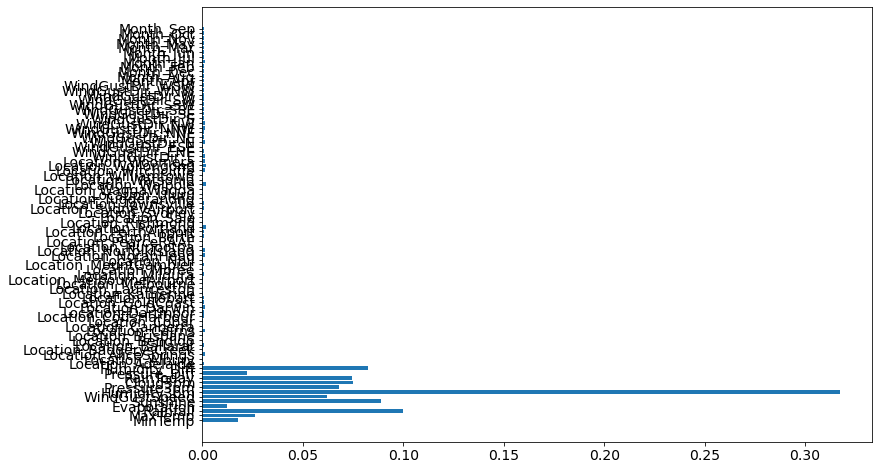

In [38]:
plt.barh(X.columns, rf.feature_importances_)

In [39]:
rf.feature_importances_.argsort()

array([34, 28, 27, 48, 37, 21, 29, 32, 49, 51, 20, 52, 13, 15, 38, 47, 17,
       42, 44, 43, 58, 18, 30, 71, 31, 57, 33, 68, 40, 75, 12, 46, 45, 65,
       16, 66, 72, 23, 79, 25, 74, 81, 22, 69, 61, 67, 64, 83, 80, 60, 82,
       73, 77, 26, 78, 39, 70, 14, 55, 35, 36, 24, 62, 56, 76, 19, 53, 59,
       63, 41, 54, 50,  3,  0, 10,  1,  5,  7,  9,  8, 11,  4,  2,  6])

Text(0.5, 0, 'Random Forest Feature Importance')

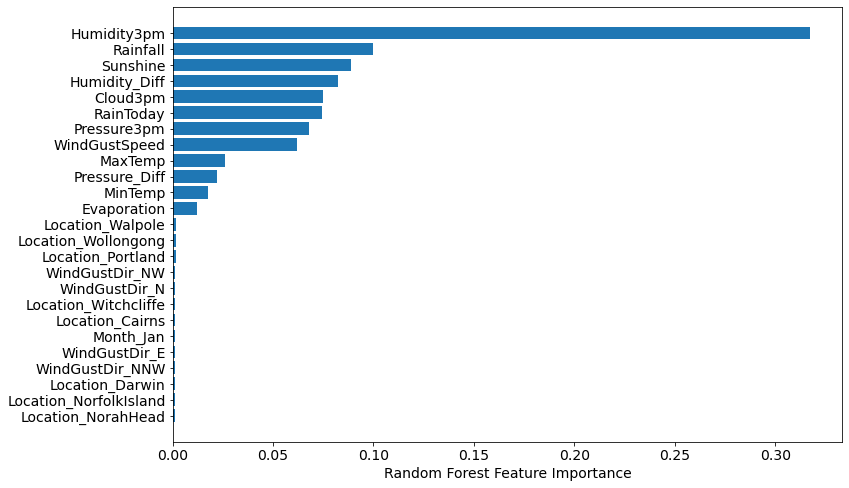

In [40]:
sorted_idx = rf.feature_importances_.argsort()
feat = X.columns[sorted_idx]
imp = rf.feature_importances_[sorted_idx]

plt.barh(feat[-25:], imp[-25:])
plt.xlabel("Random Forest Feature Importance")

### Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
GBscore = []
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=150, learning_rate = learning_rate, max_features=2, max_depth = 10, random_state = 0)
    gb.fit(Xtrain, ytrain)
    y_pred = gb.predict(X_test_scaled)
    GBscore.append(performance_metric(y_test, y_pred))


In [56]:
GBscore

[0.594370096908168,
 0.6175422974176313,
 0.6142121082009445,
 0.6048616226454804,
 0.5862246473798004,
 0.5493839628357907]

[]

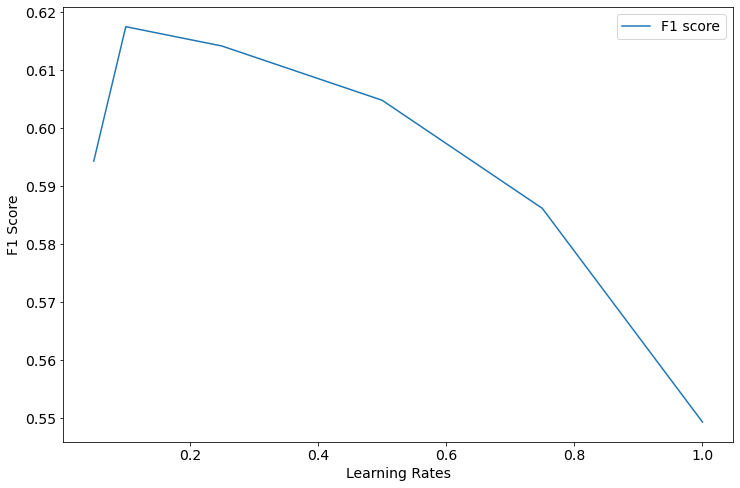

In [57]:
# Plot training error over domain

plt.plot(learning_rates, GBscore, label='F1 score')
#plt.plot(X, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Learning Rates') # Label x-axis
plt.ylabel('F1 Score') # Label y-axis
plt.legend() # Show plot labels as legend
plt.plot() # Show graph    


#### Optimal learning rate for Gradient Boosting
optimal learning rate is 0.1

In [ ]:
# use n estimators 150, max depth 10

In [58]:
gb2 = GradientBoostingClassifier(n_estimators=150, learning_rate = 1, max_features=2, max_depth = 10, random_state = 0)
gb2.fit(Xtrain, ytrain)

# make predictions for test data
y_pred = gb.predict(X_test_scaled)

In [59]:
# f1 score
performance_metric(y_test, y_pred)

0.5493839628357907

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     18562
           1       0.60      0.51      0.55      5373

    accuracy                           0.81     23935
   macro avg       0.73      0.70      0.72     23935
weighted avg       0.80      0.81      0.81     23935



<AxesSubplot:>

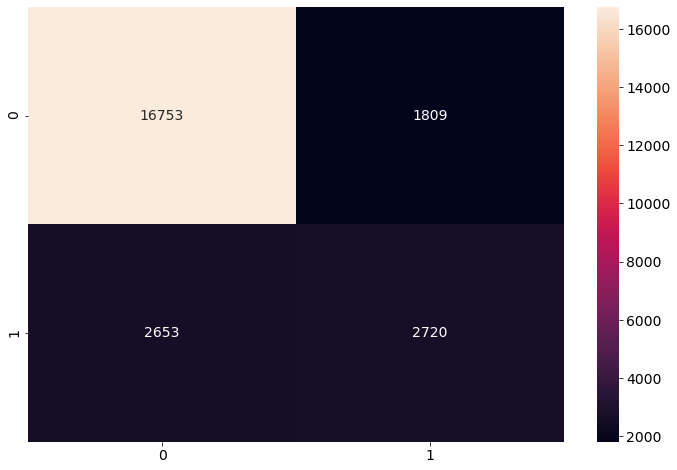

In [64]:

# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d')

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
learning_rate =  [0.05, 0.1, 0.25, 0.5, 0.75, 1]


max_depth= [2, 4, 6, 8, 10]
n_estimators= [70, 100, 150, 200]

param_dist = {'n_estimators': n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate}

gbm = GradientBoostingClassifier()

#RandomSearchCV object: 
gbm_cv = RandomizedSearchCV(gbm, param_distributions = param_dist, cv=5, scoring=scoring_fnc, n_iter=30)

#Fitting the model
gbm_cv.fit(Xtrain, ytrain)

print("Best Gradient Boosting Parameters: {}".format(gbm_cv.best_params_)) 
print("Best score is {}".format(gbm_cv.best_score_))

Best Gradient Boosting Parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.25}
Best score is 0.6257924821891059


### Logistic Regression 

In [74]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xtrain, ytrain)
# Print the accuracy from the testing data.

print('f1 score: ', f1_score(clf.predict(X_test_scaled), y_test))

f1 score:  0.6167875192265436


In [75]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [76]:
# hyperparameter tuning:

from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': Cs}

clf = LogisticRegression()
clf_cv = GridSearchCV(clf, param_grid, cv=5, scoring=scoring_fnc)
clf_cv.fit(X_test_scaled, y_test)

print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_)) 
print("Best score is {}".format(clf_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.6229357076373906


## Final test of the models:


In [ ]:
# Xtrain = X_train_scaled[:25000]
# ytrain = y_train.iloc[:25000]

In [41]:
# decision tree: 


from datetime import datetime
start_time = datetime.now()
# do your work here


# make a variable called it gini_model, and ensure the max_depth parameter is set to 6
gini_model4 = tree.DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=6, class_weight='balanced')

# Do the fit, predict, and series transformations as before. 
gini_model4.fit(X_train_scaled, y_train)
y_pred = gini_model4.predict(X_test_scaled)
pd.Series(y_pred)
print('Decision Tree model: ')
print('F1 score' , metrics.f1_score(y_test,y_pred))



end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))




Decision Tree model: 
F1 score 0.6114640048396854
Duration: 0:00:00.438987


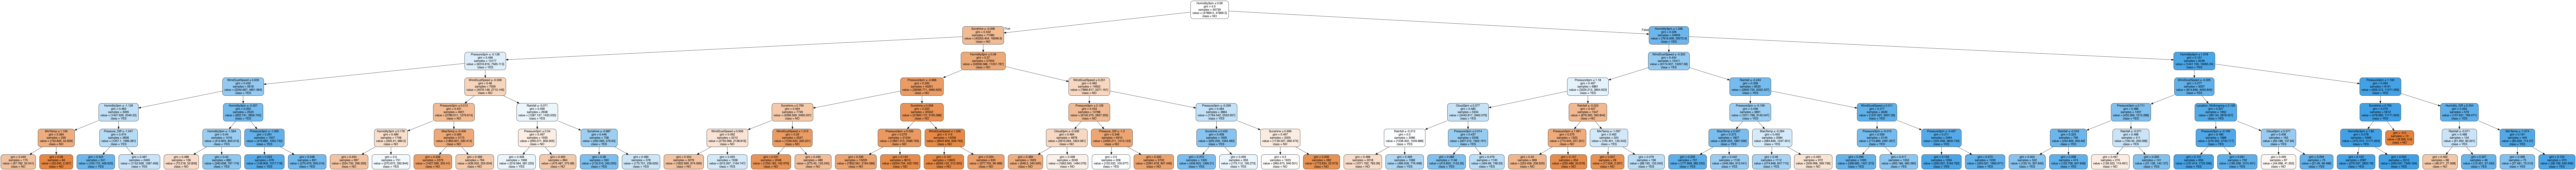

In [42]:
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree.export_graphviz(gini_model4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [78]:
# random forest: 


from datetime import datetime
start_time = datetime.now()
# do your work here


rf_model = RandomForestClassifier(n_estimators=150, max_depth=10, class_weight='balanced', criterion='gini')
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
pd.Series(y_pred)
print('Random Forest model: ')
print('F1 score' , metrics.f1_score(y_test,y_pred))



end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))



Random Forest model: 
F1 score 0.6420144112756354
Duration: 0:00:08.737272


In [79]:
# gradient boost: 


from datetime import datetime
start_time = datetime.now()



gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.25, max_depth = 6, random_state = 1234)
gb_model.fit(X_train_scaled, y_train)

# make predictions for test data
y_pred = gb_model.predict(X_test_scaled)

pd.Series(y_pred)
print('Gradient Boost model: ')
print('F1 score' , metrics.f1_score(y_test,y_pred))



end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))



Gradient Boost model: 
F1 score 0.6552886641382217
Duration: 0:01:08.342800


In [80]:
# logistic regression: 


from datetime import datetime
start_time = datetime.now()

lr_model = LogisticRegression(C=10)
# Fit the model on the trainng data.
lr_model.fit(X_train_scaled, y_train)
# Print the accuracy from the testing data.

# make predictions for test data
y_pred = lr_model.predict(X_test_scaled)

pd.Series(y_pred)
print('Logistic Regression model: ')
print('F1 score' , metrics.f1_score(y_test,y_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Logistic Regression model: 
F1 score 0.6202060048213893
Duration: 0:00:00.852280


In [ ]:
# measuring the time it takes to run each model

In [83]:
model_dict = {'Model Name' : ['Decision Tree', 'Random Forest', 'Gradient Boost', 'Logistic Regression'],
              'Performance F1 Score' : [0.6114640048396854, 0.6420144112756354, 0.6552886641382217, 0.6202060048213893],
              'Train Time' : ['0:00:00.841381', '0:00:08.737272', '0:01:08.342800', '0:00:00.852280']
             }
model_table = pd.DataFrame(model_dict)
model_table


,Model Name,Performance F1 Score,Train Time
0,Decision Tree,0.611464,0:00:00.841381
1,Random Forest,0.642014,0:00:08.737272
2,Gradient Boost,0.655289,0:01:08.342800
3,Logistic Regression,0.620206,0:00:00.852280


The gradient boost model has the highest F1 score but also takes a much longer time to train the model than the other three models. The Random Forest has the next highest F1 score very close to the performance of the gradient boost model, and it only takes 8 seconds to train. In last place, the Decision Tree and Logistic Regression models both have a similar F1 score and take under 1 second to train. 
